# WeatherPy
##### By: Sungwon Byun

### Observable Trends
1. Max temperatures are much colder in the north hemisphere than in the south, while the highest temperatures are just south below the equator. 
2. Looking at the graph of wind speeds, there appears to be two clusters of highs between the equator and the north and south poles.
3. Greatest concentration of humidity resides just south below the equator, while the lowest reside in two clusters between the latitude of 25 and 50 degrees in both north and south.

In [57]:
import pandas as pd
import requests as req
import json
import openweathermapy.core as ow
from datetime import datetime
from citipy import citipy
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
#specify size of your dataset
number_of_cities = 500

key = '7375a9cff89ecc868edf7e60d6d857f8'
#key = '50078a0e7acf496ce521d63c2905a47e'
weather_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

latitudes = []
longitudes = []
cities = []
countries = []
temperatures = []
humidities = []
wind_speeds = []
cloudiness = []
dates = []

In [68]:
#Begin for-loop

print('Beginning data retrieval...')
print('-------------------------------------------------------------------')

#split the randomization of gps coordinates into 4 sections to ensure even distribution
for i in range(number_of_cities):
    
    #while-loop runs while citipy generates a duplicate city or weather data is not available
    placeholder = 1
        
    while placeholder == 1:
        #break apart random generator in 4 to ensure even distribution of worldwide locations
        if i < 125:
            lat = random.random()*90
            long = random.random()*180
        elif i < 250:
            lat = random.random()*90
            long = (random.random()*-180)
        elif i < 375:
            lat = (random.random()*-90)
            long = (random.random()*180)
        else:
            lat = (random.random()*-90)
            long = (random.random()*-180)

        #use citipy to find nearest city from lat/long coordinates
        citipy_city = citipy.nearest_city(lat,long)
        city = citipy_city.city_name
        country = citipy_city.country_code
        
        #make sure no duplicates
        if city in cities:
            placeholder = 1
        else:
            #make sure that the weather data is available
            try:
                #retrieve weather information
                url = weather_url +'q='+city+','+country+'&units='+units+'&APPID='+key
                
                response = req.get(url).json()
                
                temperatures.append(response['main']['temp_max'])
                humidities.append(response['main']['humidity'])
                wind_speeds.append(response['wind']['speed'])
                cloudiness.append(response['clouds']['all'])
                dates.append(response['dt'])
                
                cities.append(city)
                countries.append(country)
                latitudes.append(lat)
                longitudes.append(long)
                
                placeholder = 0
                
                print('Processing Record '+str(i+1)+' | '+ citipy_city.city_name)
                print(url)
                
            except KeyError:
                placeholder = 1

print('Data retrieval: complete!')
print('-------------------------------------------------------------------')plt.scatter(longitudes,latitudes,color='darkblue',s=20)
plt.title('Latitude vs Longitude (12/22/17)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Beginning data retrieval...
-------------------------------------------------------------------
Processing Record 1 | mehran
http://api.openweathermap.org/data/2.5/weather?q=mehran,ir&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 2 | belaya gora
http://api.openweathermap.org/data/2.5/weather?q=belaya gora,ru&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 3 | okha
http://api.openweathermap.org/data/2.5/weather?q=okha,ru&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 4 | negombo
http://api.openweathermap.org/data/2.5/weather?q=negombo,lk&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 5 | ust-kuyga
http://api.openweathermap.org/data/2.5/weather?q=ust-kuyga,ru&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 6 | selyatino
http://api.openweathermap.org/data/2.5/weather?q=selyatino,ru&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 7 | nalut
http

Processing Record 57 | lakselv
http://api.openweathermap.org/data/2.5/weather?q=lakselv,no&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 58 | sam chuk
http://api.openweathermap.org/data/2.5/weather?q=sam chuk,th&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 59 | sibu
http://api.openweathermap.org/data/2.5/weather?q=sibu,my&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 60 | balabac
http://api.openweathermap.org/data/2.5/weather?q=balabac,ph&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 61 | gonen
http://api.openweathermap.org/data/2.5/weather?q=gonen,tr&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 62 | aswan
http://api.openweathermap.org/data/2.5/weather?q=aswan,eg&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 63 | beidao
http://api.openweathermap.org/data/2.5/weather?q=beidao,cn&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8

Processing Record 113 | sa kaeo
http://api.openweathermap.org/data/2.5/weather?q=sa kaeo,th&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 114 | esso
http://api.openweathermap.org/data/2.5/weather?q=esso,ru&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 115 | monopoli
http://api.openweathermap.org/data/2.5/weather?q=monopoli,it&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 116 | malaya vishera
http://api.openweathermap.org/data/2.5/weather?q=malaya vishera,ru&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 117 | turek
http://api.openweathermap.org/data/2.5/weather?q=turek,pl&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 118 | petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?q=petropavlovsk-kamchatskiy,ru&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 119 | liliani
http://api.openweathermap.org/data/2.5/weather?q=l

Processing Record 168 | maturin
http://api.openweathermap.org/data/2.5/weather?q=maturin,ve&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 169 | safford
http://api.openweathermap.org/data/2.5/weather?q=safford,us&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 170 | wahiawa
http://api.openweathermap.org/data/2.5/weather?q=wahiawa,us&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 171 | pacific grove
http://api.openweathermap.org/data/2.5/weather?q=pacific grove,us&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 172 | magnolia
http://api.openweathermap.org/data/2.5/weather?q=magnolia,us&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 173 | medina
http://api.openweathermap.org/data/2.5/weather?q=medina,co&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 174 | hearst
http://api.openweathermap.org/data/2.5/weather?q=hearst,ca&units=imperial&APPID=7

Processing Record 223 | waverly
http://api.openweathermap.org/data/2.5/weather?q=waverly,us&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 224 | douglas
http://api.openweathermap.org/data/2.5/weather?q=douglas,us&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 225 | hailey
http://api.openweathermap.org/data/2.5/weather?q=hailey,us&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 226 | stettler
http://api.openweathermap.org/data/2.5/weather?q=stettler,ca&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 227 | liverpool
http://api.openweathermap.org/data/2.5/weather?q=liverpool,ca&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 228 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?q=vestmannaeyjar,is&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 229 | fairbanks
http://api.openweathermap.org/data/2.5/weather?q=fairbanks,us&units=impe

Processing Record 279 | lumeje
http://api.openweathermap.org/data/2.5/weather?q=lumeje,ao&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 280 | gold coast
http://api.openweathermap.org/data/2.5/weather?q=gold coast,au&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 281 | kiunga
http://api.openweathermap.org/data/2.5/weather?q=kiunga,pg&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 282 | kasempa
http://api.openweathermap.org/data/2.5/weather?q=kasempa,zm&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 283 | southbridge
http://api.openweathermap.org/data/2.5/weather?q=southbridge,nz&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 284 | malanje
http://api.openweathermap.org/data/2.5/weather?q=malanje,ao&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 285 | matongo
http://api.openweathermap.org/data/2.5/weather?q=matongo,tz&units=imperial&APPID=7

Processing Record 335 | tsumeb
http://api.openweathermap.org/data/2.5/weather?q=tsumeb,na&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 336 | mayumba
http://api.openweathermap.org/data/2.5/weather?q=mayumba,ga&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 337 | wanaka
http://api.openweathermap.org/data/2.5/weather?q=wanaka,nz&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 338 | empangeni
http://api.openweathermap.org/data/2.5/weather?q=empangeni,za&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 339 | kyabram
http://api.openweathermap.org/data/2.5/weather?q=kyabram,au&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 340 | cooma
http://api.openweathermap.org/data/2.5/weather?q=cooma,au&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 341 | lubumbashi
http://api.openweathermap.org/data/2.5/weather?q=lubumbashi,cd&units=imperial&APPID=7375a9cff

Processing Record 391 | pinheiro machado
http://api.openweathermap.org/data/2.5/weather?q=pinheiro machado,br&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 392 | jatai
http://api.openweathermap.org/data/2.5/weather?q=jatai,br&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 393 | presidencia roque saenz pena
http://api.openweathermap.org/data/2.5/weather?q=presidencia roque saenz pena,ar&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 394 | camiri
http://api.openweathermap.org/data/2.5/weather?q=camiri,bo&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 395 | trelew
http://api.openweathermap.org/data/2.5/weather?q=trelew,ar&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 396 | chimbote
http://api.openweathermap.org/data/2.5/weather?q=chimbote,pe&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 397 | santo antonio do ica
http://api.openweathermap

Processing Record 445 | san pedro de ycuamandiyu
http://api.openweathermap.org/data/2.5/weather?q=san pedro de ycuamandiyu,py&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 446 | monte alegre
http://api.openweathermap.org/data/2.5/weather?q=monte alegre,br&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 447 | poco verde
http://api.openweathermap.org/data/2.5/weather?q=poco verde,br&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 448 | sao miguel do araguaia
http://api.openweathermap.org/data/2.5/weather?q=sao miguel do araguaia,br&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 449 | campestre
http://api.openweathermap.org/data/2.5/weather?q=campestre,br&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 450 | itaituba
http://api.openweathermap.org/data/2.5/weather?q=itaituba,br&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 451 | san carlos de 

Processing Record 498 | itaqui
http://api.openweathermap.org/data/2.5/weather?q=itaqui,br&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 499 | brasilia de minas
http://api.openweathermap.org/data/2.5/weather?q=brasilia de minas,br&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Processing Record 500 | maracai
http://api.openweathermap.org/data/2.5/weather?q=maracai,br&units=imperial&APPID=7375a9cff89ecc868edf7e60d6d857f8
Data retrieval: complete!
-------------------------------------------------------------------


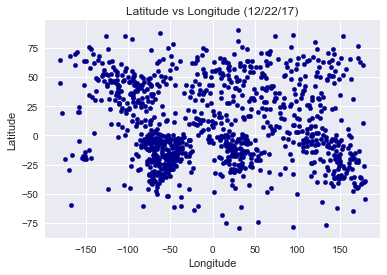

In [69]:
#check whether cities are evenly distributed or clumped
plt.scatter(longitudes,latitudes,color='darkblue',s=20)
plt.title('Latitude vs Longitude (12/22/17)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [79]:
#create dataframe for retrieved data
df = pd.DataFrame({'City':cities,
                   'Cloudiness':cloudiness,
                   'Country':countries,
                   'Date':dates,
                   'Humidity':humidities,
                   'Lat':latitudes,
                   'Lng':longitudes,
                   'Max Temp':temperatures,
                   'Wind Speed':wind_speeds})

df.to_csv('City_Data',index=False)

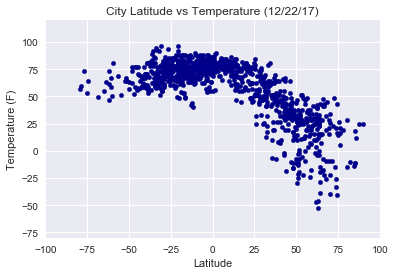

In [74]:
#set seaborn
sns.set()

plt.scatter(latitudes,temperatures,color='darkblue',s=20)
plt.title('City Latitude vs Temperature (12/22/17)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.xlim(-100,100)
plt.ylim(-80,120)
plt.show()

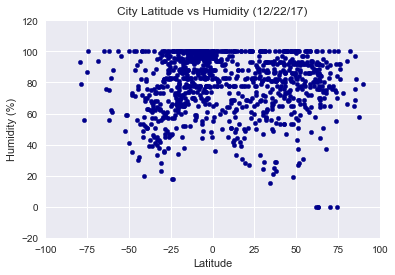

In [75]:
plt.scatter(latitudes,humidities,color='darkblue',s=20)
plt.title('City Latitude vs Humidity (12/22/17)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim(-100,100)
plt.ylim(-20,120)
plt.show()

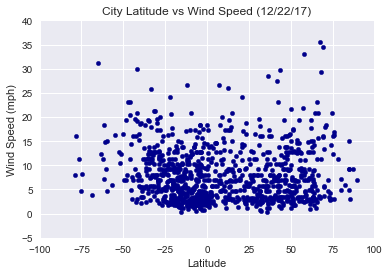

In [76]:
plt.scatter(latitudes,wind_speeds,color='darkblue',s=20)
plt.title('City Latitude vs Wind Speed (12/22/17)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlim(-100,100)
plt.ylim(-5,40)
plt.show()

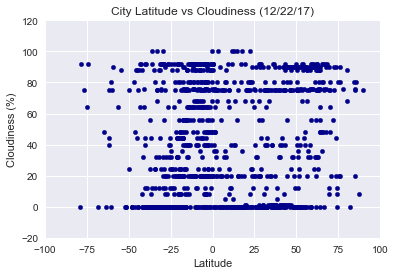

In [78]:
plt.scatter(latitudes,cloudiness,color='darkblue',s=20)
plt.title('City Latitude vs Cloudiness (12/22/17)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim(-100,100)
plt.ylim(-20,120)
plt.show()